Assignment 4: Orbits

Go to the NASA Horizon's system that provides accurate information on the Epemeris (ie orbit) of the earth.  https://ssd.jpl.nasa.gov/horizons/app.html#/

Find the position and the velocity of the earth-moon barycenter (that is the center of mass of the earth-moon) around the sun as of January 1, 2023.  

In [1]:
# *******************************************************************************
# Revised: April 12, 2021         Earth Barycenter                              3
# *******************************************************************************
# Start time      : A.D. 2023-Jan-01 00:00:00.0000 TDB
# *******************************************************************************
#             JDTDB,            Calendar Date (TDB),                      X,                      Y,                      Z,                     VX,                     VY,                     VZ,
# **************************************************************************************************************************************************************************************************
# $$SOE
# 2459945.500000000, A.D. 2023-Jan-01 00:00:00.0000, -2.546597571235102E+07,  1.448859647243238E+08, -7.369198073051870E+03, -2.982259256616586E+01, -5.269813532948369E+00,  4.272100509203902E-04,

# *******************************************************************************
#  Revised: July 31, 2013                  Sun                                 10
# *******************************************************************************
# Start time      : A.D. 2023-Jan-01 00:00:00.0000 TDB
# *******************************************************************************

#  PHYSICAL PROPERTIES (updated 2018-Aug-15):
#   GM, km^3/s^2          = 132712440041.93938  Mass, 10^24 kg        = ~1988500
# *******************************************************************************
#             JDTDB,            Calendar Date (TDB),                      X,                      Y,                      Z,                     VX,                     VY,                     VZ,
# **************************************************************************************************************************************************************************************************
# $$SOE
# 2459945.500000000, A.D. 2023-Jan-01 00:00:00.0000,  0.000000000000000E+00,  0.000000000000000E+00,  0.000000000000000E+00,  0.000000000000000E+00,  0.000000000000000E+00,  0.000000000000000E+00,

import numpy as np
import scipy
import matplotlib.pyplot as plt

x_emb = np.array([-2.546597571235102E+07,  1.448859647243238E+08, -7.369198073051870E+03]) * 1e3 # m
v_emb = np.array([-2.982259256616586E+01, -5.269813532948369E+00,  4.272100509203902E-04]) * 1e3 # m/s
m_earth = 5.97219e24 # kg
m_moon = 7.349e22 # kg
m_emb = m_earth + m_moon
GM_E = 398600.435436 * (1e3) ** 3
GM_M = 4902.800066 * (1e3) ** 3
GM_EMB = GM_E + GM_M

x_sun = np.array([0.000000000000000E+00,  0.000000000000000E+00,  0.000000000000000E+00]) * 1e3 # m
v_sun = np.array([0.000000000000000E+00,  0.000000000000000E+00,  0.000000000000000E+00]) * 1e3 # m/s
m_sun = 1988500e24 # kg
GM_S = 132712440041.93938 * (1e3) ** 3 # m^3/s^2

print("The position of the Earth-Moon barycenter about the sun as of January 1, 2023 is ", x_emb, " km with velocity ", v_emb, " km/s")

The position of the Earth-Moon barycenter about the sun as of January 1, 2023 is  [-2.54659757e+10  1.44885965e+11 -7.36919807e+06]  km with velocity  [-2.98225926e+04 -5.26981353e+03  4.27210051e-01]  km/s


Calculate the position and velocity of the earth-moon and sun with respect to their center of mass.  Note that you can use the Horizon system to get the parameters for the planets and the sun, by editting the "target body" line and calculating an ephemeris.  Also note that it provides a parameter GM (although in units of km $^3$ /s $^3$ ), for each body, which is known more precisely than M, because it is difficult to measure G precisely, whereas GM can be derived from measurements of orbits.  

For this you need the formulae for position $\vec{X}$ of the center of mass in terms of the positions $\vec{x_i}$ and masses $m_i$ of the components:  $$\vec{X}=\frac {1}{\sum m_i}\sum m_i \vec{x_i}$$ as well as its derivative for velocity:$$\vec{V}=\frac {1}{\sum m_i}\sum m_i \vec{v_i}$$

In [2]:
def weighted_average(emb, sun):

    return 1 / (m_emb + m_sun) * (emb * m_emb + sun * m_sun)

x_cm = weighted_average(x_emb, x_sun)
v_cm = weighted_average(v_emb, v_sun)

print("The position of the center of mass of the sun and Earth-moon barycenter is ", x_cm, " m with velocity ", v_cm, " m/s\n")

x_emb_rel = x_emb - x_cm
v_emb_rel = v_emb - v_cm
x_sun_rel = x_sun - x_cm
v_sun_rel = v_sun - v_cm

print("The position of the Earth-Moon is ", x_emb_rel, " m with velocity", v_emb_rel, " m/s with respect to the center of mass of the entire system")
print("The position of the Sun is ", x_sun_rel, " m with velocity", v_sun_rel, " m/s with respect to the center of mass of the entire system")

The position of the center of mass of the sun and Earth-moon barycenter is  [-7.74245270e+04  4.40498625e+05 -2.24046658e+01]  m with velocity  [-9.06700042e-02 -1.60218805e-02  1.29885210e-06]  m/s

The position of the Earth-Moon is  [-2.54658983e+10  1.44885524e+11 -7.36917567e+06]  m with velocity [-2.98225019e+04 -5.26979751e+03  4.27208752e-01]  m/s with respect to the center of mass of the entire system
The position of the Sun is  [ 7.74245270e+04 -4.40498625e+05  2.24046658e+01]  m with velocity [ 9.06700042e-02  1.60218805e-02 -1.29885210e-06]  m/s with respect to the center of mass of the entire system


Integrate the ODE using solve_ivp: $$\vec{a}=\frac{\vec{F}}{m}=\frac{1}{m}\left(-G\frac{M_S M_E}{r^2}\hat{r}\right)$$

where $M_S$ is the mass of the solar system without the earth-moon system and $M_E$ is the mass of the earth-moon system, and $\vec{r}$ is from the sun to earth-moon.  


$$
\frac{d\ }{dt}
\begin{bmatrix}
\vec v \\
\vec x
\end{bmatrix}
=
\begin{bmatrix}
\vec F/m \\
\vec v
\end{bmatrix}
$$
For the acceleration of the Earth-Moon system, $m=m_\text{emb}=M_E$. So,
$$
\frac{d\ }{dt}
\begin{bmatrix}
\vec v \\
\vec x
\end{bmatrix}
=
\begin{bmatrix}
-(GM_S)/(r^3)\vec r \\
\vec v
\end{bmatrix}
$$

Since the Sun contains the vast majority of the mass in the solar system, approximate $M_S$ as the mass of the sun and use the position of Earth-Moon as $\vec r$.

$$
\frac{d\ }{dt}
\begin{bmatrix}
M_E\vec v_E \\
\vec x_E
\end{bmatrix}
=
\begin{bmatrix}
-GM_SM_E/|\vec x_E-\vec x_S|^{3/2}(\vec x_E-\vec x_S) \\
\vec v_E
\end{bmatrix} \\ \\
\frac{d\ }{dt}
\begin{bmatrix}
\vec v_E \\
\vec x_E
\end{bmatrix}
=
\begin{bmatrix}
-GM_S/|\vec x_E-\vec x_S|^{3/2}(\vec x_E-\vec x_S) \\
\vec v_E
\end{bmatrix}
$$

$$
\frac{d\ }{dt}
\begin{bmatrix}
M_S\vec v_S \\
\vec x_S
\end{bmatrix}
=
\begin{bmatrix}
-GM_SM_E/|\vec x_S-\vec x_E|^{3/2}(\vec x_S-\vec x_E) \\
\vec v_S
\end{bmatrix} \\
\frac{d\ }{dt}
\begin{bmatrix}
\vec v_S \\
\vec x_S
\end{bmatrix}
=
\begin{bmatrix}
-GM_E/|\vec x_S-\vec x_E|^{3/2}(\vec x_S-\vec x_E) \\
\vec v_S
\end{bmatrix}
$$

[array([-2.54659757e+10, -2.54659763e+10, -2.54659817e+10, ...,
       -2.42299705e+10, -2.54389552e+10, -2.54496947e+10]), array([1.44885965e+11, 1.44885965e+11, 1.44885964e+11, ...,
       1.45098983e+11, 1.44890736e+11, 1.44888840e+11]), array([-7369198.07305187, -7369198.06520261, -7369197.98671003, ...,
       -7386624.83912827, -7369584.94816209, -7369431.21184481])]


Text(0.5, 1.0, 'Position of Earth-Moon barycenter about Sun')

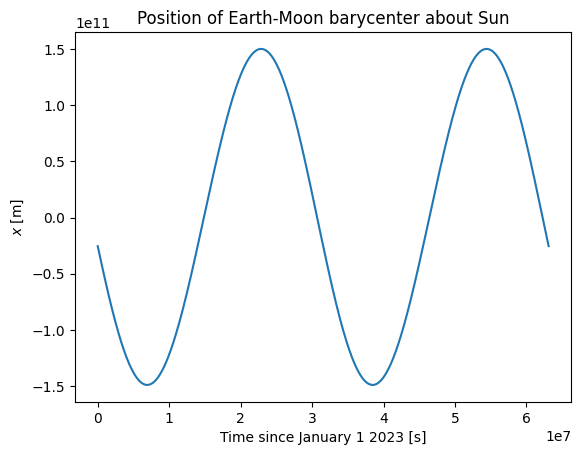

In [7]:
def orbit(t, y):

    x_E = y[:3]
    v_E = y[3:6]
    x_S = y[6:9]
    v_S = y[9:12]

    eq_x_E = v_E
    eq_v_E = -GM_S / (np.linalg.norm(x_E - x_S) ** 3) * (x_E - x_S)

    eq_x_S = v_S
    eq_v_S = -GM_EMB / (np.linalg.norm(x_S - x_E) ** 3) * (x_S - x_E)

    return np.concatenate((eq_x_E, eq_v_E, eq_x_S, eq_v_S))

T = 365.2425 * 3600 * 24 # year in seconds
y_0 = np.concatenate((x_emb, v_emb, x_sun, v_sun))
# solve over 2 years to be safe
sol = scipy.integrate.solve_ivp(orbit, [0, T * 2], y_0, rtol = 1e-13, atol = 1e-13, dense_output=True)

x_E_sol = [sol.y[i] for i in range(0, 3)]
v_E_sol = [sol.y[i] for i in range(3, 6)]
x_S_sol = [sol.y[i] for i in range(6, 9)]
v_S_sol = [sol.y[i] for i in range(9, 12)]
t_sol = sol.t


print(x_E_sol)

# plot to make sure it looks reasonable
plt.plot(t_sol, x_E_sol[0])
plt.xlabel("Time since January 1 2023 [s]")
plt.ylabel("$x$ [m]")
plt.title("Position of Earth-Moon barycenter about Sun")

Make a quantitative estimate of the precision of your calculation.


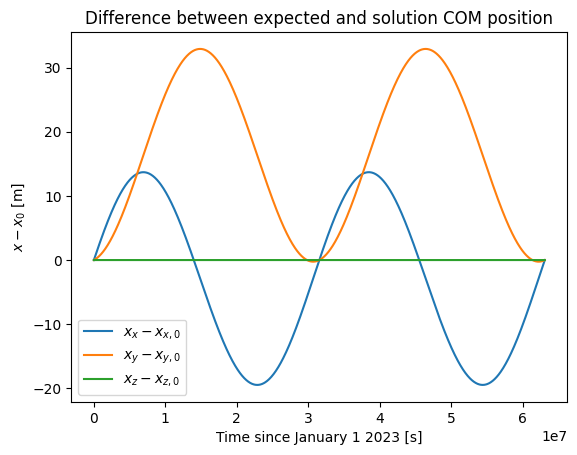

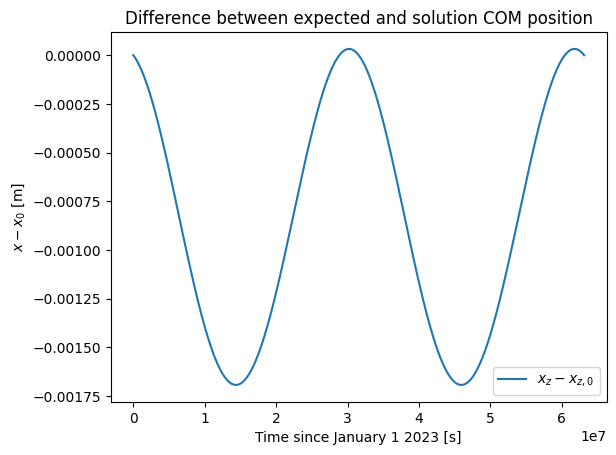

The maximumum values for center of mass position are  [-77424.52701067734, 440498.6251449948, 59.5739486119718] m for each component x, y, z.
The error in calculation of position is on the order of 10 m for x and y and on the order of 10e-3 m for z.
So the error is about 1 part in 10^4 for x, 1 in 10^5 for y, and 1 part in 10^5 for z.


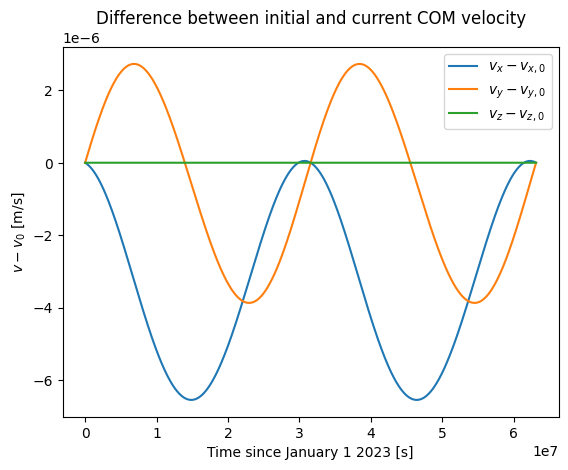

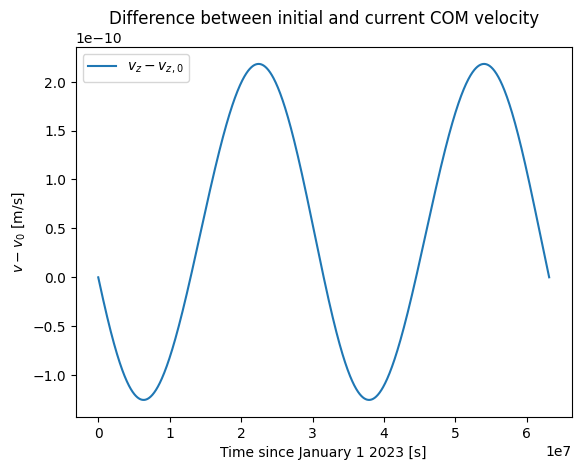

The maximumum values for center of mass velocities are  [-0.09066995432467652, -0.01601915134645685, 1.2990702393594275e-06] m/s for each component x, y, z.
So the error in the calculation of velocity is on the order of 1e-6 m/s for x and y and on the order of 10e-10 for z.
So the error is about 1 part in 10^5 for x, 1 in 10^4 for y, and 1 part in 10^3 for z.


In [4]:
# look at position of center of mass (should be changing linearly) over time
x_cm_0 = np.array([weighted_average(x_E_sol[i][0], x_S_sol[i][0]) for i in range(0, 3)])
x_cm_f = np.array([weighted_average(x_E_sol[i][-1], x_S_sol[i][-1]) for i in range(0, 3)])
x_slope = np.array([
    (x_cm_f[i] - x_cm_0[i]) / (t_sol[-1] - t_sol[0]) for i in range(0, 3)
])
# this will not give the exact maximum since these values are discrete but it is good for an estimate
x_cm_max = [np.amax([
    weighted_average(x_E_sol[i][j], x_S_sol[i][j]) for j in range(0, len(t_sol))
]) for i in range(0, 3)]
expected_x_cm = np.array([[x_cm_0[i] + x_slope[i] * t for t in t_sol] for i in range(0, 3)])
plt.plot(t_sol, [weighted_average(x_E_sol[0][i], x_S_sol[0][i]) - expected_x_cm[0][i] for i in range(0, len(t_sol))], label="$x_x-x_{x,0}$")
plt.plot(t_sol, [weighted_average(x_E_sol[1][i], x_S_sol[1][i]) - expected_x_cm[1][i] for i in range(0, len(t_sol))], label="$x_y-x_{y,0}$")
plt.plot(t_sol, [weighted_average(x_E_sol[2][i], x_S_sol[2][i]) - expected_x_cm[2][i] for i in range(0, len(t_sol))], label="$x_z-x_{z,0}$")
plt.xlabel("Time since January 1 2023 [s]")
plt.ylabel("$x-x_0$ [m]")
plt.title("Difference between expected and solution COM position")
plt.legend()
plt.show()

# plot z on a different graph since the error is a much different order of magnitude
plt.plot(t_sol, [weighted_average(x_E_sol[2][i], x_S_sol[2][i]) - expected_x_cm[2][i] for i in range(0, len(t_sol))], label="$x_z-x_{z,0}$")
plt.xlabel("Time since January 1 2023 [s]")
plt.ylabel("$x-x_0$ [m]")
plt.title("Difference between expected and solution COM position")
plt.legend()
plt.show()

print("The maximumum values for center of mass position are ", x_cm_max, "m for each component x, y, z.")
print("The error in calculation of position is on the order of 10 m for x and y and on the order of 10e-3 m for z.")
print("So the error is about 1 part in 10^4 for x, 1 in 10^5 for y, and 1 part in 10^5 for z.")

# look at velocity of center of mass (should be constant) over time
v_cm_0 = np.array([
    weighted_average(v_E_sol[i][0], v_S_sol[i][0]) for i in range(0, 3)
])
# this will not give the exact maximum since these values are discrete but it is good for an estimate
v_cm_max = [np.amax([
    weighted_average(v_E_sol[i][j], v_S_sol[i][j]) for j in range(0, len(t_sol))
]) for i in range(0, 3)]
plt.plot(t_sol, [weighted_average(v_E_sol[0][i], v_S_sol[0][i]) - v_cm_0[0] for i in range(0, len(t_sol))], label="$v_x-v_{x,0}$")
plt.plot(t_sol, [weighted_average(v_E_sol[1][i], v_S_sol[1][i]) - v_cm_0[1] for i in range(0, len(t_sol))], label="$v_y-v_{y,0}$")
plt.plot(t_sol, [weighted_average(v_E_sol[2][i], v_S_sol[2][i]) - v_cm_0[2] for i in range(0, len(t_sol))], label="$v_z-v_{z,0}$")
plt.xlabel("Time since January 1 2023 [s]")
plt.ylabel("$v-v_0$ [m/s]")
plt.title("Difference between initial and current COM velocity")
plt.legend()
plt.show()

# plot z on a different graph since the error is a much different order of magnitude
plt.plot(t_sol, [weighted_average(v_E_sol[2][i], v_S_sol[2][i]) - v_cm_0[2] for i in range(0, len(t_sol))], label="$v_z-v_{z,0}$")
plt.xlabel("Time since January 1 2023 [s]")
plt.ylabel("$v-v_0$ [m/s]")
plt.title("Difference between initial and current COM velocity")
plt.legend()
plt.show()

print("The maximumum values for center of mass velocities are ", v_cm_max, "m/s for each component x, y, z.")
print("So the error in the calculation of velocity is on the order of 1e-6 m/s for x and y and on the order of 10e-10 for z.")
print("So the error is about 1 part in 10^5 for x, 1 in 10^4 for y, and 1 part in 10^3 for z.")

Plot the distance of the earth from the center of mass.  Find the aphelion ($r_{max}$=maximum distance) and perihelion($r_{min}$=minimum distance), as well as the lengths of the major ($b$)  and minor axes ($a$) of the ellipse, and the time of the year at which the aphelion and perihelion occur.  For this you can use the formula relating the eccentricity, $\epsilon$:
$$\epsilon=\frac{r_{max}-r_{min}}{r_{max}+r_{min}}=\sqrt{1-\frac{a^2}{b^2}}$$

$$
a=b\sqrt{1-\left(\frac{r_\text{max}-r_\text{min}}{r_\text{max}+r_\text{min}}\right)^2}
$$

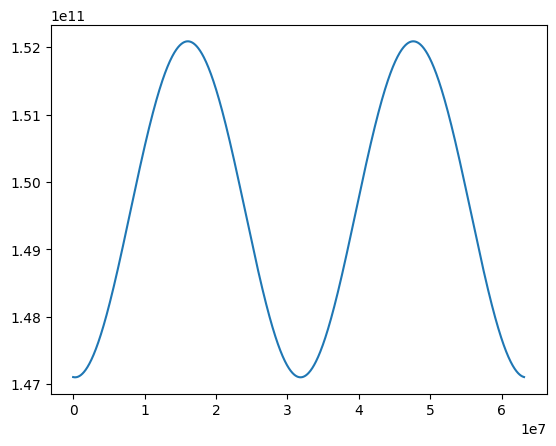

r_max = 147102784496.84158 m on day 186 (185.75) and r_min = 152086819340.6121 m on day 3 (3.13).
The major axis is b = 299189603837.4537 m and the minor axis is a = 299148087811.1852 m.


In [5]:
def d(x, f, delta=1e-2):

    # since we are using such large time scales, use a larger delta
    x1 = x + delta
    x2 = x1 - delta

    return (f(x1) - f(x2)) / (x1 - x2)

sol_dist = [np.linalg.norm([x_E_sol[j][i] - weighted_average(x_E_sol[j][i], x_S_sol[j][i]) for j in range(0, 3)]) for i in range(0, len(t_sol))]

dist_interp = scipy.interpolate.interp1d(t_sol, sol_dist, kind="cubic")
d_dist_interp = lambda t: d(t, dist_interp)

plt.plot(t_sol, [dist_interp(t) for t in t_sol])
plt.show()

extrema = scipy.optimize.root(d_dist_interp, [1.5e7, 5e5])
aphelion = extrema.x[0]
perihelion = extrema.x[1]
r_min = dist_interp(aphelion)
r_max = dist_interp(perihelion)

aphelion_day = aphelion / 24 / 3600
perihelion_day = perihelion / 24 / 3600
print("r_max =", r_max, f"m on day {aphelion_day:.0f} ({aphelion_day:.2f}) and r_min =", r_min, f"m on day {perihelion_day:.0f} ({perihelion_day:.2f}).")

b = r_min + r_max
a = b * np.sqrt( 1 - ((r_max - r_min) / (r_max + r_min))**2)

print("The major axis is b =", b, "m and the minor axis is a =", a, "m.")


What is the length of your calculated year?  

In [6]:
dist_0 = dist_interp(0)

dist_diff = lambda t: dist_interp(t) - dist_0

year = scipy.optimize.root(dist_diff, [T])
days = year.x[0] / 24 / 3600

print(f"The calculated length of a year is {days:.4f} days.")

The calculated length of a year is 365.2468 days.
